In [2]:
import csv
import os
import string
import random
import requests
import threading
import calendar
import datetime
import json 
import pandas as pd
import _thread
import collections
from tabulate import tabulate
import matplotlib.pyplot as plt
import operator
from collections import OrderedDict

SCOW40
.......
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20200325.csv
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200325.csv
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20200324.csv
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200324.csv
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20200323.csv
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200323.csv
Load url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20200322.csvLoad url https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200322.csv

Load url https://raw.githubusercontent.co

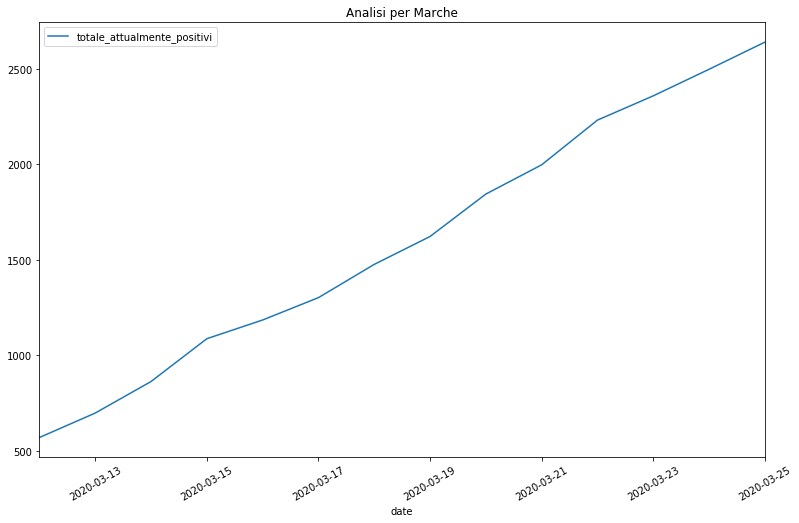

In [10]:


def id_generatorString(size=4, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))
def id_generatorNumber(size=2, chars=string.digits):
    return ''.join(random.choice(chars) for _ in range(size))

for i in range (0,1): 
    print ('%s%s' % (id_generatorString(),id_generatorNumber()))
    
print (".......")  

'''
execute_lock
with open("Provincia.csv","r") as csvfile:
    spamreader = csv.reader(csvfile, delimiter=';')
    for row in spamreader:
       print(row)
       #prov[row[1]]= row[5]
        
'''        
'''
https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-20200224.csv


Iterate over the last 10 days 
d= datetime.date.today()-datetime.timedelta(10)

print( d.format("%y/%m/%d"))


'''       

provincie = {}
regioni ={}
a_lock=threading.Lock()
'''
Update a dictionary for a given datetime
'''
def toInt(s):
    if s :
        return int(s)
    return 0

'''

ricoverati_con_sintomi	terapia_intensiva	totale_ospedalizzati	isolamento_domiciliare	totale_attualmente_positivi	nuovi_attualmente_positivi	dimessi_guariti	deceduti	totale_casi	tamponi
'''


def updateForProvincie(d):
    CSV_URL="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province-"+d.strftime("%Y%m%d")+".csv"
    with requests.Session() as s:
        print ("Load url %s" % CSV_URL) 
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        cr = csv.DictReader(decoded_content.splitlines(), delimiter=',')     
        for record in cr:
            pr = record["sigla_provincia"]
            entry ={"date":d, "tot":toInt(record["totale_casi"]), "regione":record["denominazione_regione"]}
            a_lock.acquire()
            if (pr not in provincie):
                provincie[pr]=[]
        
            provincie[pr].append(entry)
            a_lock.release()
       
def updateForRegioni(d):
    #https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-20200224.csv
    CSV_URL="https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni-"+d.strftime("%Y%m%d")+".csv"
    with requests.Session() as s:
        print ("Load url %s" % CSV_URL) 
        download = s.get(CSV_URL)
        decoded_content = download.content.decode('utf-8')
        cr = csv.DictReader(decoded_content.splitlines(), delimiter=',')     
        for record in cr:
            
            regione = record["denominazione_regione"]
            # Initialize key list  
            key_list = ["ricoverati_con_sintomi","terapia_intensiva","totale_ospedalizzati","isolamento_domiciliare","totale_attualmente_positivi","nuovi_attualmente_positivi","dimessi_guariti","deceduti"] 
  
            # Using list comprehension + get() 
            # Selective key values in dictionary 
            entry = {}
            entry["date"] = d;
            for k in key_list :
                entry[k] = toInt(record[k])
           
            
           
            #entry ={"date":d, "tot":toInt(record["totale_casi"]), "regione":record["denominazione_regione"]}
            a_lock.acquire()
            if (regione not in regioni):
                regioni[regione]=[]
        
            regioni[regione].append(entry)
            a_lock.release()
       
def printAnalysisForProvincie(regione):
    for prov in provincie.keys():
        if (provincie[prov][0])["regione"] == regione :

            print ("******************************" )
            print ("******** provincia %s ********" % prov)
            sorted_list = sorted(provincie[prov], key=lambda k: k['date']) 

            data_frame= pd.DataFrame.from_dict(sorted_list)   
        
            data_frame["inc"] = data_frame['tot'].diff(1)
            data_frame["perc"] = data_frame['tot'].pct_change(1)
        
            print (data_frame)
        
       
            data_frame.plot(x ='date', y='tot', figsize=(13,8), rot=30, title=prov)	


def printAnalysisForRegione(regione):
    print ("******************************" )
    print ("******** Regione %s ********" % regione)
    sorted_list = sorted(regioni[regione], key=lambda k: k['date']) 
    data_frame= pd.DataFrame.from_dict(sorted_list)       
    data_frame["inc"] = data_frame['totale_attualmente_positivi'].diff(1)
    data_frame["perc"] = data_frame['totale_attualmente_positivi'].pct_change(1)
    data_frame["inc_ti"] = data_frame['terapia_intensiva'].diff(1)
    data_frame["inc_ospeda"] = data_frame['totale_ospedalizzati'].diff(1)
        

    

    



    #data_frame["inc"] = data_frame['tot'].diff(1)
    #data_frame["perc"] = data_frame['tot'].pct_change(1)  
    #df, headers='keys', tablefmt='psql')
    #print (tabulate(data_frame,headers='keys', tablefmt="html"))
    print (data_frame)
    dic = data_frame.to_dict()
    dates =dic["date"]
    positivi = dic["totale_attualmente_positivi"]
    print ([x.isoformat() for x in dates.values()])
    print (positivi.values())
   
    
    data_frame.plot(x ='date', y='totale_attualmente_positivi', figsize=(13,8), rot=30, title="Analisi per "+regione)	





    
threads_provincie = []
threads_regioni = []


for i in range(1,15):
    d =datetime.date.today()-datetime.timedelta(i)
    t = threading.Thread(target=updateForProvincie, args=(d,))
    t_r =threading.Thread(target=updateForRegioni, args=(d,))
    threads_provincie.append(t)
    threads_regioni.append(t_r)


    t.start()
    t_r.start()
  
for i in range(1,15):
    threads_provincie[i-1].join()
    threads_regioni[i-1].join()
    

#for k in regioni.keys():
#    printAnalysisForRegione(k)
printAnalysisForRegione("Marche")

## 